In [167]:
import pandas as pd
import numpy as np


## Get Actuals

In [168]:
year_df = pd.read_parquet("/Users/kristianertresvag/Documents/Handelshøyskolen BI/Master/4. semester/Master Thesis/Master Thesis/M3 Data/M3_yearly_processed.parquet")
quart_df = pd.read_parquet("/Users/kristianertresvag/Documents/Handelshøyskolen BI/Master/4. semester/Master Thesis/Master Thesis/M3 Data/M3_quarter_processed.parquet")
month_df = pd.read_parquet("/Users/kristianertresvag/Documents/Handelshøyskolen BI/Master/4. semester/Master Thesis/Master Thesis/M3 Data/M3_month_processed.parquet")


In [169]:
def get_actuals (df):
    # Sort the dataframe by Series and Date
    df_sorted = df.sort_values(by=['Series', 'Date'])
    
    # Define a function that gets the last `n` entries for each group
    def last_n_entries(group):
        # `NF` is assumed to be the same for all rows in the group, so we take the first one
        n = group['NF'].iloc[0]
        return group.tail(n)
    
    # Apply the function to each group and concatenate the results
    actuals_df = df_sorted.groupby('Series').apply(last_n_entries).reset_index(drop=True)
    
    return actuals_df



In [170]:
actuals_year_df = get_actuals(year_df)
actuals_quart_df = get_actuals(quart_df)
actuals_month_df = get_actuals(month_df)

actuals_df = pd.concat([actuals_year_df, 
                        actuals_quart_df,
                        actuals_month_df],
                        ignore_index=True)



In [171]:
display(actuals_df)

Series   N  NF      Category    Value       Date  Measurement
0           1  20   6  MICRO         5379.75 1989-01-01          NaN
1           1  20   6  MICRO         6158.68 1990-01-01          NaN
2           1  20   6  MICRO         6876.58 1991-01-01          NaN
3           1  20   6  MICRO         7851.91 1992-01-01          NaN
4           1  20   6  MICRO         8407.84 1993-01-01          NaN
...       ...  ..  ..           ...      ...        ...          ...
35617    2829  71  18         OTHER  1282.50 1988-07-01         67.0
35618    2829  71  18         OTHER  1261.30 1988-08-01         68.0
35619    2829  71  18         OTHER  1263.40 1988-09-01         69.0
35620    2829  71  18         OTHER  1257.10 1988-10-01         70.0
35621    2829  71  18         OTHER  1233.70 1988-11-01         71.0

[35622 rows x 7 columns]

## Merge

In [172]:
forecasts_df = pd.read_parquet("/Users/kristianertresvag/Documents/Handelshøyskolen BI/Master/4. semester/Master Thesis/Master Thesis/Analysis/complete_forecast_data.parquet")

results_df = pd.merge(forecasts_df, actuals_df[['Series', 'Date', 'Value', 'Category', 'NF']], how='left', on=['Series', 'Date'])

results_df.rename(columns={'Value': 'Actual'}, inplace=True)

#results_df.to_parquet('results.parquet', index=False, compression='snappy', engine='pyarrow')
results_df.to_csv('results.csv')

display(results_df)

Series       Date      TimeGPT      Chronos       Moirai  \
0           1 1989-01-01  5121.754395  5471.703660  5075.040039   
1           1 1990-01-01  4974.531738  5847.765768  5983.503906   
2           1 1991-01-01  4750.660156  6195.623217  5960.694336   
3           1 1992-01-01  4366.261719  6195.623217  6046.625977   
4           1 1993-01-01  3914.425781  5866.568873  7204.881348   
...       ...        ...          ...          ...          ...   
35617    2829 1988-07-01  1437.689209  1259.141011  1307.136963   
35618    2829 1988-08-01  1442.109741  1243.785633  1468.140381   
35619    2829 1988-09-01  1439.912842  1243.785633  1361.496338   
35620    2829 1988-10-01  1437.093018  1243.785633  1473.072998   
35621    2829 1988-11-01  1435.933838  1243.785633  1442.986572   

       ForecastPeriod   ARARMA  Auto-ANN  AutoBox1  AutoBox2  ...      RBF  \
0                   1  5553.26   5453.28   5442.92   4930.25  ...  5550.22   
1                   2  6246.45   6003.49   5969.23   5479.36  ...  6152.23   
2                   3  7026.18   6587.93   6495.55   5472.61  ...  6648.95   
3                   4  7903.23   7206.76   7021.87   6021.72  ...  6965.22   
4                   5  8889.77   7860.01   7548.18   6014.98  ...  7038.06   
...               ...      ...       ...       ...       ...  ...      ...   
35617              14  1335.28   1139.87   1254.13   1204.10  ...  1371.58   
35618              15  1316.26   1116.26   1234.02   1182.42  ...  1355.06   
35619              16  1307.62   1091.50   1213.86   1160.74  ...  1345.82   
35620              17  1293.64   1066.18   1193.64   1139.06  ...  1336.08   
35621              18  1277.55   1039.38   1173.46   1117.38  ...  1318.76   

       ROBUST-Trend   SINGLE  SMARTFCS    THETA  THETAsm   WINTER   Actual  \
0           5204.32  4936.99   5259.00  5414.60  5163.08  5406.43  5379.75   
1           5471.66  4936.99   5675.00  5934.47  5390.88  5875.96  6158.68   
2           5738.99  4936.99   6091.00  6331.96  5155.17  6345.48  6876.58   
3           6006.32  4936.99   6507.00  6822.35  5147.46  6815.00  7851.91   
4           6273.66  4936.99   6923.00  7140.76  5152.92  7284.53  8407.84   
...             ...      ...       ...      ...      ...      ...      ...   
35617       1223.93  1507.60   1170.98  1226.58  1452.61  1193.75  1282.50   
35618       1203.67  1507.60   1147.83  1207.17  1451.93  1171.28  1261.30   
35619       1183.41  1507.60   1124.68  1187.85  1448.36  1148.82  1263.40   
35620       1163.14  1507.60   1101.53  1168.63  1458.19  1126.35  1257.10   
35621       1142.88  1507.60   1078.37  1149.50  1464.25  1103.89  1233.70   

           Category  NF  
0      MICRO          6  
1      MICRO          6  
2      MICRO          6  
3      MICRO          6  
4      MICRO          6  
...             ...  ..  
35617         OTHER  18  
35618         OTHER  18  
35619         OTHER  18  
35620         OTHER  18  
35621         OTHER  18  

[35622 rows x 31 columns]

## Calculate Metrics

In [174]:
forecast_cols = [col for col in results_df.columns if col not in ['Series', 'Date', 'Naive2', 'Actual', 'ForecastPeriod', 'NF', 'Category']]

def calculate_mase_per_series(df, actual_col, forecast_cols, benchmark_col):
    results = {}

    # Calculate the MAE of the Naive2 benchmark per Series
    df['AbsErrorBenchmark'] = abs(df[actual_col] - df[benchmark_col])
    benchmark_mae = df.groupby('Series')['AbsErrorBenchmark'].mean()

    for series in df['Series'].unique():
        series_df = df[df['Series'] == series]
        series_mase = {}
        for forecast_col in forecast_cols:
            # Calculate the MAE for the forecast method
            series_df['AbsErrorForecast'] = abs(series_df[actual_col] - series_df[forecast_col])
            forecast_mae = series_df['AbsErrorForecast'].mean()
            # Calculate MASE
            series_mase[forecast_col] = forecast_mae / benchmark_mae[series]
        results[series] = series_mase
    
    # Cleanup the temporary columns
    df.drop('AbsErrorBenchmark', axis=1, inplace=True)
    
    return results

# Assuming the actual column name is 'Actual'. If not, please replace 'Actual' with the actual column name.
mase_results = calculate_mase_per_series(results_df, 'Actual', forecast_cols, 'NAIVE2')

# Print the results
mase_results


/var/folders/h6/pplgpj2536x9l5zs7z8vmzdm0000gn/T/ipykernel_62031/3009625297.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series_df['AbsErrorForecast'] = abs(series_df[actual_col] - series_df[forecast_col])
/var/folders/h6/pplgpj2536x9l5zs7z8vmzdm0000gn/T/ipykernel_62031/3009625297.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series_df['AbsErrorForecast'] = abs(series_df[actual_col] - series_df[forecast_col])
/var/folders/h6/pplgpj2536x9l5zs7z8vmzdm0000gn/T/ipykernel_62031/3009625297.py:15: S

{1: {'TimeGPT': 1.2158037233163284,
  'Chronos': 0.6058507226523364,
  'Moirai': 0.41846966540788366,
  'ARARMA': 0.12580698058883105,
  'Auto-ANN': 0.16319499916601157,
  'AutoBox1': 0.23962986396487257,
  'AutoBox2': 0.6578838651739798,
  'AutoBox3': 0.47881071136750886,
  'B-J auto': 0.20341013299476457,
  'COMB S-H-D': 0.5044841834267845,
  'DAMPEN': 0.22059944414846266,
  'Flors-Pearc1': 0.22425984405471808,
  'Flors-Pearc2': 0.7594531006423468,
  'ForcX': 0.8540668021223421,
  'ForecastPro': 0.20341013299476457,
  'HOLT': 0.3098552097533717,
  'NAIVE2': 1.0,
  'PP-Autocast': 0.2171797396407727,
  'RBF': 0.3525617520935925,
  'ROBUST-Trend': 0.6048935767406606,
  'SINGLE': 1.0,
  'SMARTFCS': 0.4247900777192773,
  'THETA': 0.32755547078823516,
  'THETAsm': 0.8878823942576552,
  'WINTER': 0.3098552097533717,
  'AbsErrorBenchmark': 2.0847557469545337},
 2: {'TimeGPT': 1.5355240620814476,
  'Chronos': 1.6447125841789862,
  'Moirai': 1.079225639880265,
  'ARARMA': 0.7707722150378717,
 

In [175]:
categories_dict = {
    'NAIVE2': 'Naive/Simple',
    'SINGLE': 'Naive/Simple',
    'HOLT': 'Naive/Simple',
    'ROBUST-Trend': 'Naive/Simple',
    'WINTER': 'Naive/Simple',
    'DAMPEN': 'Explicit Trend Models',
    'PP-Autocast': 'Explicit Trend Models',
    'THETAsm': 'Decomposition',
    'COMB S-H-D': 'Decomposition',
    'THETA': 'Decomposition',
    'B-J auto': 'ARIMA/ARARMA Models',
    'AutoBox1': 'ARIMA/ARARMA Models',
    'AutoBox2': 'ARIMA/ARARMA Models',
    'AutoBox3': 'ARIMA/ARARMA Models',
    'AAM 1': 'ARIMA/ARARMA Models',
    'AAM 2': 'ARIMA/ARARMA Models',
    'ARARMA': 'ARIMA/ARARMA Models',
    'ForecastPro': 'Expert Systems',
    'SMARTFCS': 'Expert Systems',
    'RBF': 'Expert Systems',
    'Flors-Pearc1': 'Expert Systems',
    'Flors-Pearc2': 'Expert Systems',
    'ForcX': 'Expert Systems',
    'Auto-ANN': 'Neural Networks',
    'TimeGPT': 'Transformer-based',
    'Chronos': 'Transformer-based',
    'Moirai': 'Transformer-based'
}

In [176]:
# Assuming mase_results is a dictionary where the key is the series number
# and the value is another dictionary with forecasting methods as keys and their MASE as values.

# Convert the nested dictionary into a DataFrame
mase_df = pd.DataFrame.from_dict(mase_results, orient='index')


# Calculate the average MASE for each forecasting method
median_mase = mase_df.median().sort_values()

# Convert the average MASE scores to a DataFrame for better visibility
median_mase_df = pd.DataFrame(median_mase, columns=['MedianMASE'])

median_mase_df = median_mase_df.reset_index()
median_mase_df.columns = ['Method', 'MedianMASE']

median_mase_df['Category'] = median_mase_df['Method'].map(categories_dict)

median_mase_df

Method  MedianMASE               Category
0               THETA    0.876507          Decomposition
1                 RBF    0.894707         Expert Systems
2                HOLT    0.902498           Naive/Simple
3          COMB S-H-D    0.907147          Decomposition
4             Chronos    0.914308      Transformer-based
5              WINTER    0.915548           Naive/Simple
6              ARARMA    0.926383    ARIMA/ARARMA Models
7            Auto-ANN    0.940868        Neural Networks
8        Flors-Pearc2    0.940975         Expert Systems
9             THETAsm    0.951704          Decomposition
10       ROBUST-Trend    0.952784           Naive/Simple
11           AutoBox1    0.955092    ARIMA/ARARMA Models
12        ForecastPro    0.958485         Expert Systems
13           AutoBox2    0.963142    ARIMA/ARARMA Models
14           AutoBox3    0.966182    ARIMA/ARARMA Models
15              ForcX    0.967323         Expert Systems
16             DAMPEN    0.967805  Explicit Trend Models
17        PP-Autocast    0.968280  Explicit Trend Models
18           SMARTFCS    0.970563         Expert Systems
19       Flors-Pearc1    0.978023         Expert Systems
20           B-J auto    0.985000    ARIMA/ARARMA Models
21            TimeGPT    0.996777      Transformer-based
22             NAIVE2    1.000000           Naive/Simple
23             SINGLE    1.000000           Naive/Simple
24             Moirai    1.031133      Transformer-based
25  AbsErrorBenchmark    9.867940                    NaN

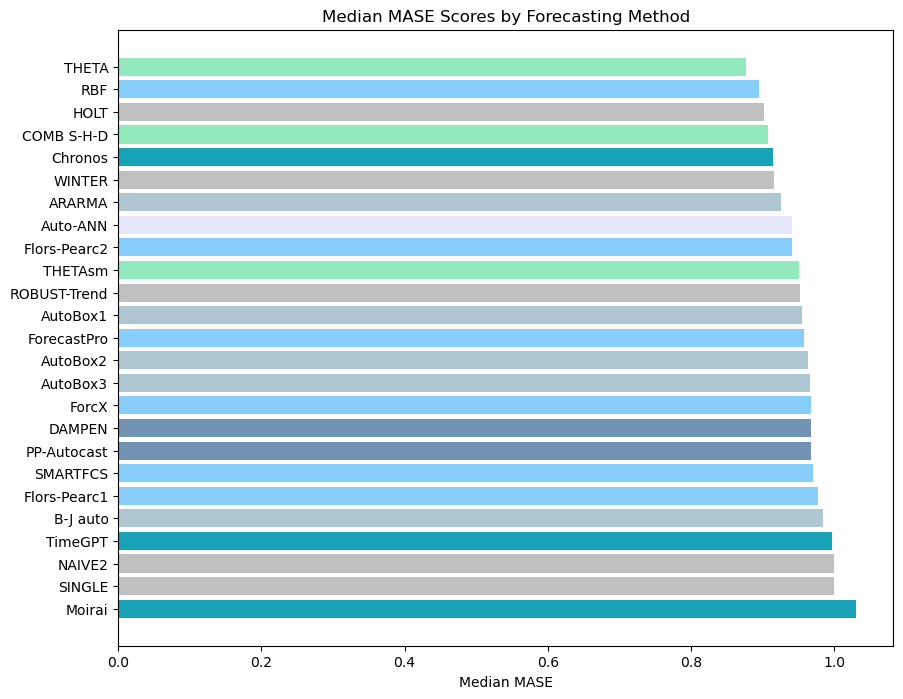

In [ ]:
import matplotlib.pyplot as plt


# Define colors for each category (customize the category names and colors)
color_map = {
    'Transformer-based': '#17a2b8',  # Vivid Turquoise
    'Naive/Simple': '#c0c0c0',       # Soft Gray
    'ARIMA/ARARMA Models': '#aec6cf', # Gentle Blue
    'Explicit Trend Models': '#7393B3', # Dusty Blue
    'Decomposition': '#93e9be',        # Seafoam Green
    'Expert Systems': '#87cefa',       # Light Sky Blue
    'Neural Networks': '#e6e6fa',      # Pale Lavender
}
# Map the colors to the dataframe categories
category_colors = median_mase_df['Category'].map(color_map)

# Create a bar chart with different colors for each category
plt.figure(figsize=(10, 8))
plt.barh(median_mase_df['Method'], median_mase_df['MedianMASE'], color=category_colors)
plt.xlabel('Median MASE')
plt.title('Median MASE Scores by Forecasting Method')
plt.gca().invert_yaxis()  # Invert y-axis to have the best method at the top
plt.show()


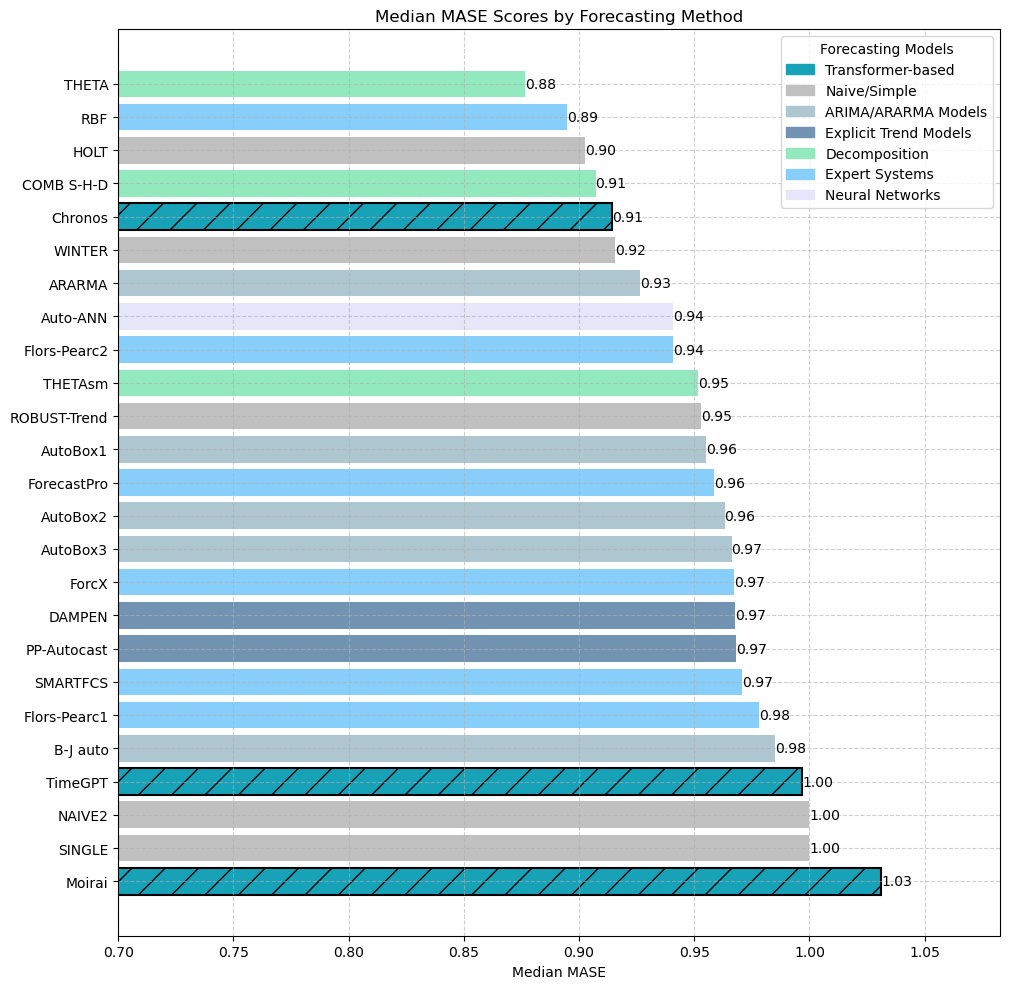

In [ ]:
# Map the colors to the dataframe categories
category_colors = median_mase_df['Category'].map(color_map)

# Create a bar chart with different colors for each category
plt.figure(figsize=(12, 10))
bars = plt.barh(median_mase_df['Method'], median_mase_df['MedianMASE'], color=category_colors)

# Highlight 'Transformer-based' bars
transformer_bars = [bar for bar, method in zip(bars, median_mase_df['Method']) if median_mase_df.loc[median_mase_df['Method'] == method, 'Category'].values[0] == 'Transformer-based']
for bar in transformer_bars:
    bar.set_edgecolor('black')  # Adding a black border to the bar
    bar.set_linewidth(1.5)  # Making the border thicker
    bar.set_hatch('/')  # Adding a hatch pattern

# Add value labels to each bar
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}', va='center', ha='left')

plt.xlabel('Median MASE')
plt.title('Median MASE Scores by Forecasting Method')
plt.gca().invert_yaxis()  # Invert y-axis to have the best method at the top
plt.legend(
    [plt.Rectangle((0,0),1,1, color=color_map[category]) for category in color_map],
    color_map.keys(),
    title="Forecasting Models",
    loc='best'  # Place the legend inside the plot in the lower right corner
)

plt.grid(True, linestyle='--', alpha=0.6)
plt.xlim(left=0.7)
plt.tight_layout(rect=[0,0,0.85,1])  # Adjust the rect to make space for the legend
plt.show()

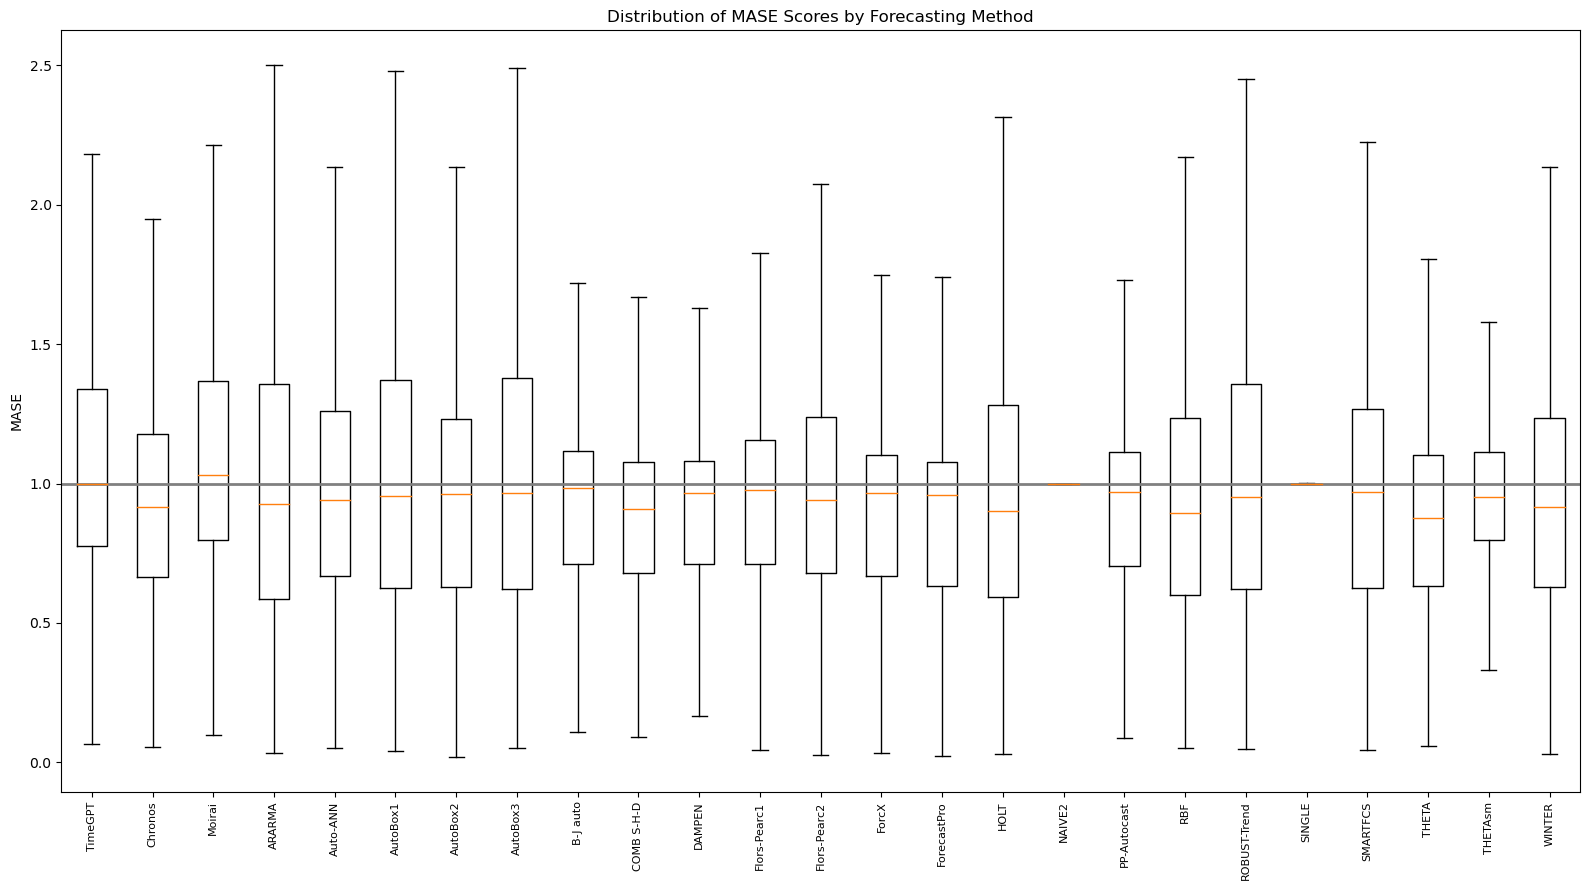

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df = mase_df

# Create a larger figure size to accommodate many methods
plt.figure(figsize=(16, 9))  # Adjust as necessary

# Create a box plot without showing outliers
plt.boxplot([df[method] for method in df.columns], labels=df.columns, showfliers=False)

# Rotate the x-axis labels to prevent overlap
plt.xticks(rotation=90)

# Set a smaller font size for the method labels if necessary
plt.tick_params(axis='x', which='major', labelsize=8)

# Optional: Set custom whiskers to a specific percentile
# For example, to set whiskers to the 5th and 95th percentiles:
#percentiles = df.quantile([0.05, 0.95])
#whiskers = [percentiles.loc[0.05], percentiles.loc[0.95]]

#plt.boxplot([df[method] for method in df.columns], labels=df.columns, whis=whiskers)

plt.axhline(y=1, color='grey', linestyle='-', linewidth=2, label='Benchmark')


plt.ylabel('MASE')
plt.title('Distribution of MASE Scores by Forecasting Method')

plt.tight_layout()  # Adjust the padding
plt.show()

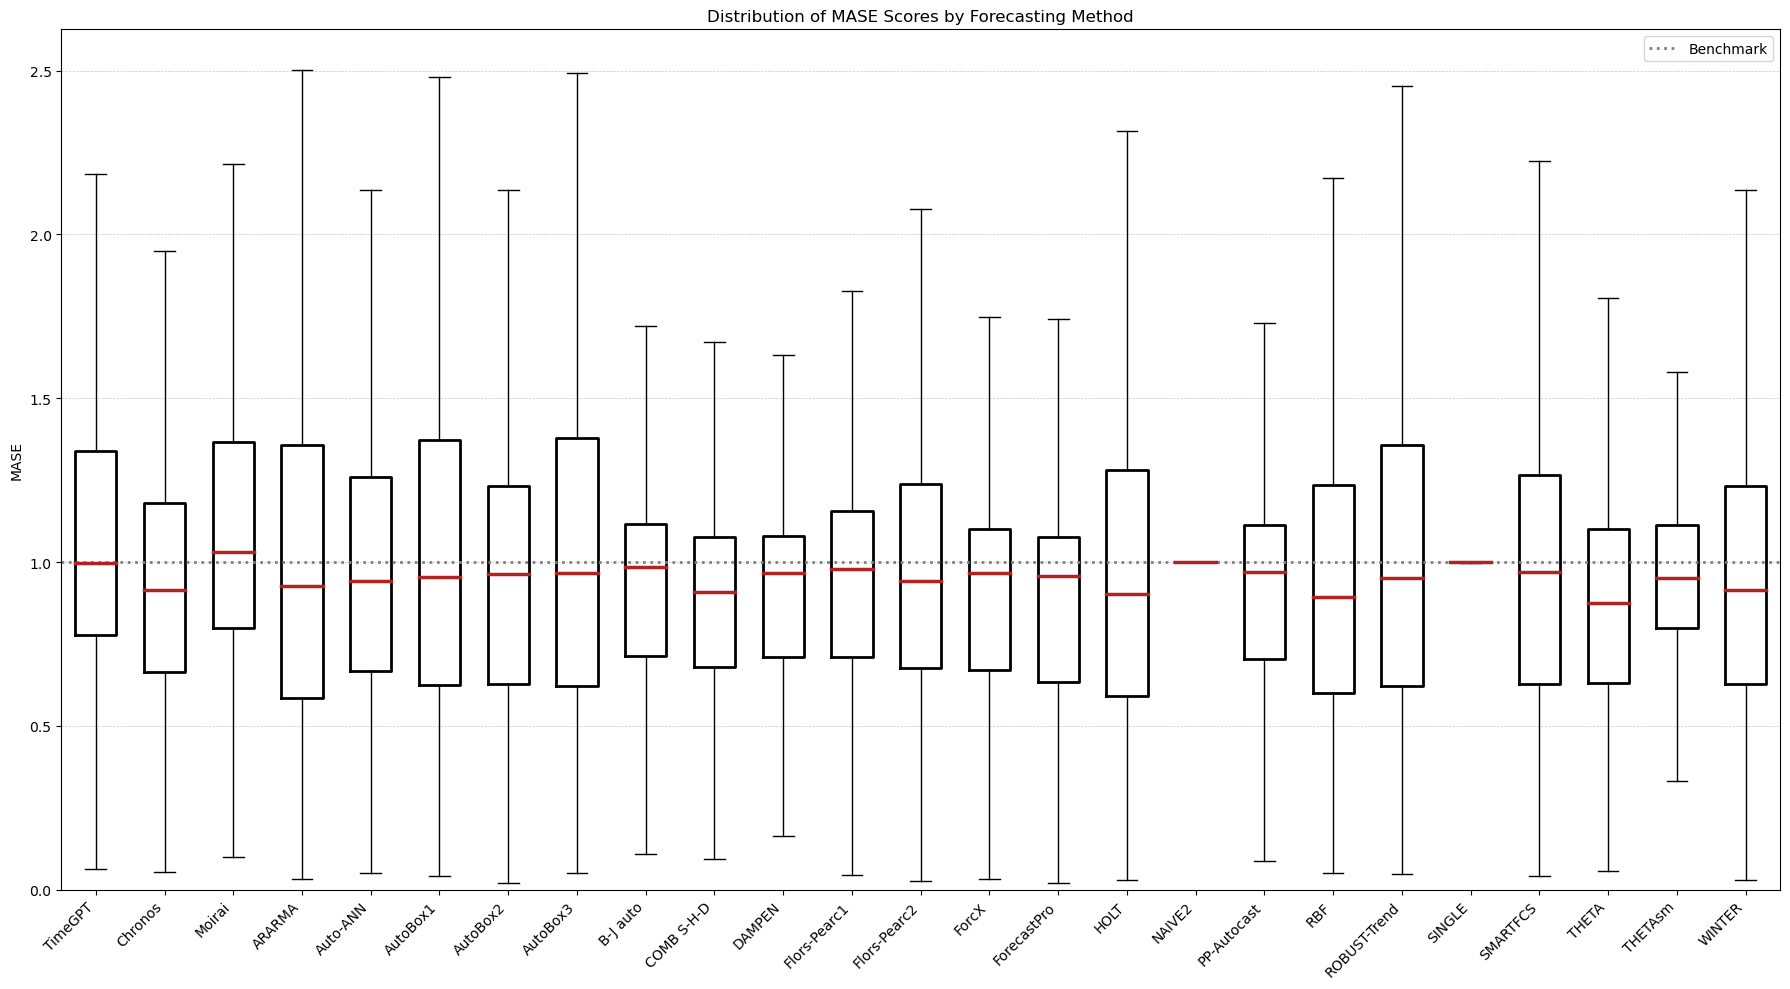

In [ ]:
# Create a larger figure size
plt.figure(figsize=(18, 10))  # Adjust as necessary

# Create a box plot without showing outliers
boxprops = dict(linestyle='-', linewidth=2, color='black')  # Box properties
medianprops = dict(linestyle='-', linewidth=2.5, color='firebrick')  # Median line properties
plt.boxplot([df[method] for method in df.columns], labels=df.columns, showfliers=False, 
            boxprops=boxprops, medianprops=medianprops, widths=0.6)

# Rotate the x-axis labels to prevent overlap
plt.xticks(rotation=45, ha='right')  # 'ha' is the same as horizontalalignment

# Add grid lines
plt.grid(True, which='both', linestyle='--', linewidth=0.5, axis='y', alpha=0.7)

# Set the y-axis to start at 0
plt.ylim(bottom=0)


plt.ylabel('MASE')
plt.title('Distribution of MASE Scores by Forecasting Method')

# Add a horizontal benchmark line
plt.axhline(y=1, color='grey', linestyle='dotted', linewidth=2, label='Benchmark')

# Add a legend to the plot
plt.legend(loc='upper right')

plt.tight_layout()  # Adjust the padding
plt.show()

In [177]:
yearly_results = results_df[results_df['NF'] == 6]
quart_results = results_df[results_df['NF'] == 8]
month_results = results_df[results_df['NF'] == 18]

micro_results = results_df[results_df['Category'] == 'MICRO']
industry_results = results_df[results_df['Category'] == 'INDUSTRY']
macro_results = results_df[results_df['Category'] == 'MACRO']
finance_results = results_df[results_df['Category'] == 'FINANCE']
demographic_results = results_df[results_df['Category'] == 'DEMOGRAPHIC']
other_results = results_df[results_df['Category'] == 'OTHER']


yearly_mase_results = calculate_mase_per_series(yearly_results, 'Actual', forecast_cols, 'NAIVE2')
quart_mase_results = calculate_mase_per_series(quart_results, 'Actual', forecast_cols, 'NAIVE2')
month_mase_results = calculate_mase_per_series(month_results, 'Actual', forecast_cols, 'NAIVE2')

micro_mase_results = calculate_mase_per_series(micro_results, 'Actual', forecast_cols, 'NAIVE2')
industry_mase_results = calculate_mase_per_series(industry_results, 'Actual', forecast_cols, 'NAIVE2')
macro_mase_results = calculate_mase_per_series(macro_results, 'Actual', forecast_cols, 'NAIVE2')
finance_mase_results = calculate_mase_per_series(finance_results, 'Actual', forecast_cols, 'NAIVE2')
demographic_mase_results = calculate_mase_per_series(demographic_results, 'Actual', forecast_cols, 'NAIVE2')
other_mase_results = calculate_mase_per_series(other_results, 'Actual', forecast_cols, 'NAIVE2')

/var/folders/h6/pplgpj2536x9l5zs7z8vmzdm0000gn/T/ipykernel_62031/3009625297.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AbsErrorBenchmark'] = abs(df[actual_col] - df[benchmark_col])
/var/folders/h6/pplgpj2536x9l5zs7z8vmzdm0000gn/T/ipykernel_62031/3009625297.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series_df['AbsErrorForecast'] = abs(series_df[actual_col] - series_df[forecast_col])
/var/folders/h6/pplgpj2536x9l5zs7z8vmzdm0000gn/T/ipykernel_62031/3009625297.py:15: SettingWithCopyWarnin

ValueError: Invalid RGBA argument: nan

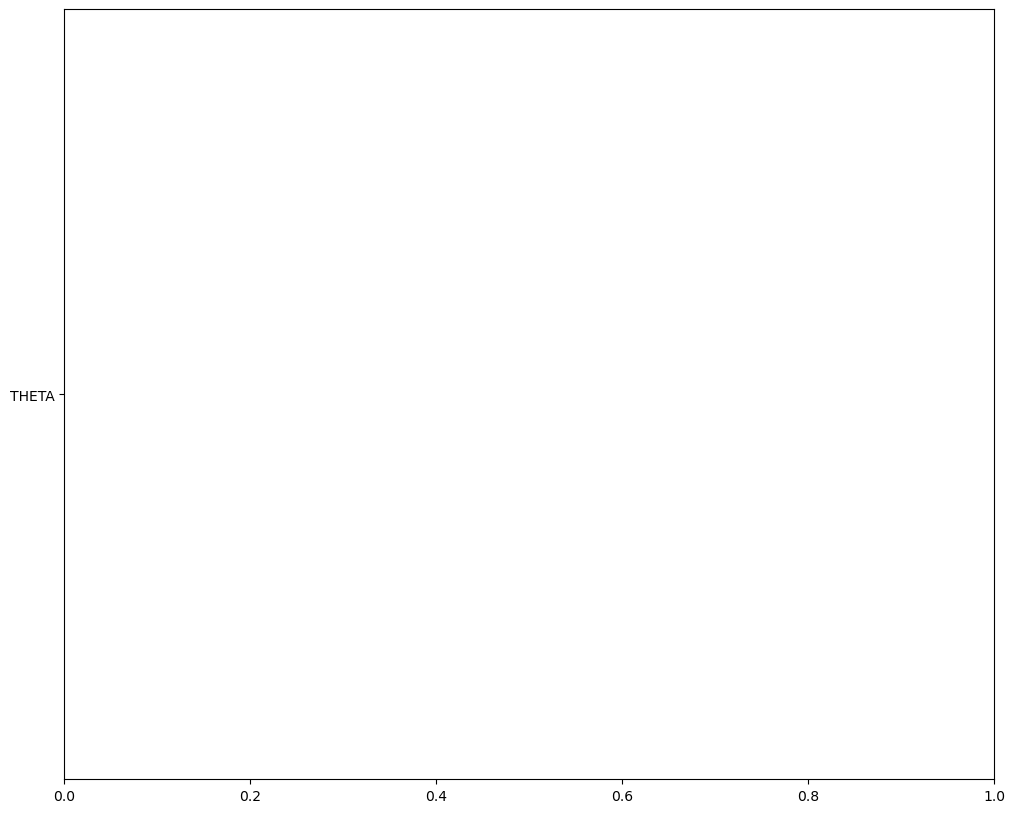

In [183]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_mase_results(mase_results, categories_dict, color_map, title="Median MASE Scores by Forecasting Method"):
    # Convert the nested dictionary into a DataFrame
    mase_df = pd.DataFrame.from_dict(mase_results, orient='index')

    # Calculate the average MASE for each forecasting method
    median_mase = mase_df.median().sort_values()
    
    # Convert the average MASE scores to a DataFrame for better visibility
    median_mase_df = pd.DataFrame(median_mase, columns=['MedianMASE'])
    median_mase_df = median_mase_df.reset_index()
    median_mase_df.columns = ['Method', 'MedianMASE']
    
    # Map categories and colors
    median_mase_df['Category'] = median_mase_df['Method'].map(categories_dict)
    category_colors = median_mase_df['Category'].map(color_map)
    
    # Create a bar chart
    plt.figure(figsize=(12, 10))
    bars = plt.barh(median_mase_df['Method'], median_mase_df['MedianMASE'], color=category_colors)
    
    # Highlight 'Transformer-based' bars
    transformer_bars = [bar for bar, method in zip(bars, median_mase_df['Method']) if 'Transformer-based' == median_mase_df.loc[median_mase_df['Method'] == method, 'Category'].values[0]]

    for bar in transformer_bars:
        bar.set_edgecolor('black')
        bar.set_linewidth(1.5)
        bar.set_hatch('/')
    
    # Add value labels
    for bar in bars:
        plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.2f}', va='center', ha='left')
    
    plt.xlabel('Median MASE')
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.legend(
        [plt.Rectangle((0,0),1,1, color=color_map[category]) for category in color_map],
        color_map.keys(),
        title="Forecasting Models",
        loc='best'
    )
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.xlim(left=0.7)
    plt.tight_layout(rect=[0,0,0.85,1])
    plt.show()


plot_mase_results(yearly_mase_results, categories_dict, color_map, "Yearly MASE Scores by Forecasting Method")
plot_mase_results(quart_mase_results, categories_dict, color_map, "Quarterly MASE Scores by Forecasting Method")
plot_mase_results(month_mase_results, categories_dict, color_map, "Monthly MASE Scores by Forecasting Method")
